In [10]:
import numpy as np
import pandas as pd
import pickle
import sys
import os
import dsc
from dsc.query_engine import Query_Processor as dscQP
from dsc import dsc_io

import matplotlib.pyplot as plt
from pymir import mpl_stylesheet
from pymir import mpl_utils
mpl_stylesheet.banskt_presentation(splinecolor = 'black', dpi = 120)

import utils

In [11]:
dsc_output = "/home/saikatbanerjee/scratch/work/gradvi-experiments/trendfiltering_accuracy"
dsc_fname  = os.path.basename(os.path.normpath(dsc_output))
db = os.path.join(dsc_output, dsc_fname + ".db")
dscoutpkl = os.path.join("../dsc/results", dsc_fname + "_dscout.pkl")
dscout    = pd.read_pickle(dscoutpkl)

print(db)
plotprefix = "compare_elbo_rmse_trendfiltering"

/home/saikatbanerjee/scratch/work/gradvi-experiments/trendfiltering_accuracy/trendfiltering_accuracy.db


In [12]:
dscout

,DSC,simulate,simulate.n,simulate.strue,simulate.snr,simulate.sfix,simulate.dtrue,fit,fit.DSC_TIME,tfmse.err,tfmse.init_err,tfmae.err,tfmae.init_err
0,1,changepoint,4096,0.2,36.478428,10,0,gradvi_compound_init,218.032045,0.000497,0.001244,NaN,NaN
1,1,changepoint,4096,0.6,7.908613,10,0,gradvi_compound_init,183.932882,0.007420,0.006206,NaN,NaN
2,1,changepoint,4096,1.0,4.418398,10,0,gradvi_compound_init,233.503566,0.008688,0.022855,NaN,NaN
3,1,changepoint,4096,1.4,2.817925,10,0,gradvi_compound_init,208.243014,0.027142,0.056593,NaN,NaN
4,1,changepoint,4096,1.8,0.189756,10,0,gradvi_compound_init,84.262734,0.040646,0.035552,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,25,changepoint,4096,0.2,21.566265,10,0,gradvi_compound_init,210.286130,NaN,NaN,0.014033,0.025337
246,25,changepoint,4096,0.6,9.573863,10,0,gradvi_compound_init,156.229090,NaN,NaN,0.045020,0.092059
247,25,changepoint,4096,1.0,2.235311,10,0,gradvi_compound_init,188.279042,NaN,NaN,0.057877,0.115822
248,25,changepoint,4096,1.4,1.211339,10,0,gradvi_compound_init,115.129803,NaN,NaN,0.097057,0.159462


In [13]:
def get_xy_snr(df, errmode = 'mse'):
    errstr = f"tf{errmode}"
    gvstr  = f"{errstr}.err"
    glstr  = f"{errstr}.init_err"
    dfs    = df[df[gvstr].notna()]
    gverr  = dfs[gvstr].to_numpy()
    glerr  = dfs[glstr].to_numpy()
    snr    = dfs['simulate.snr'].to_numpy()
    #if errmode == 'mse':
    #    gverr = np.sqrt(gverr)
    #    glerr = np.sqrt(glerr)
    return glerr, gverr, snr

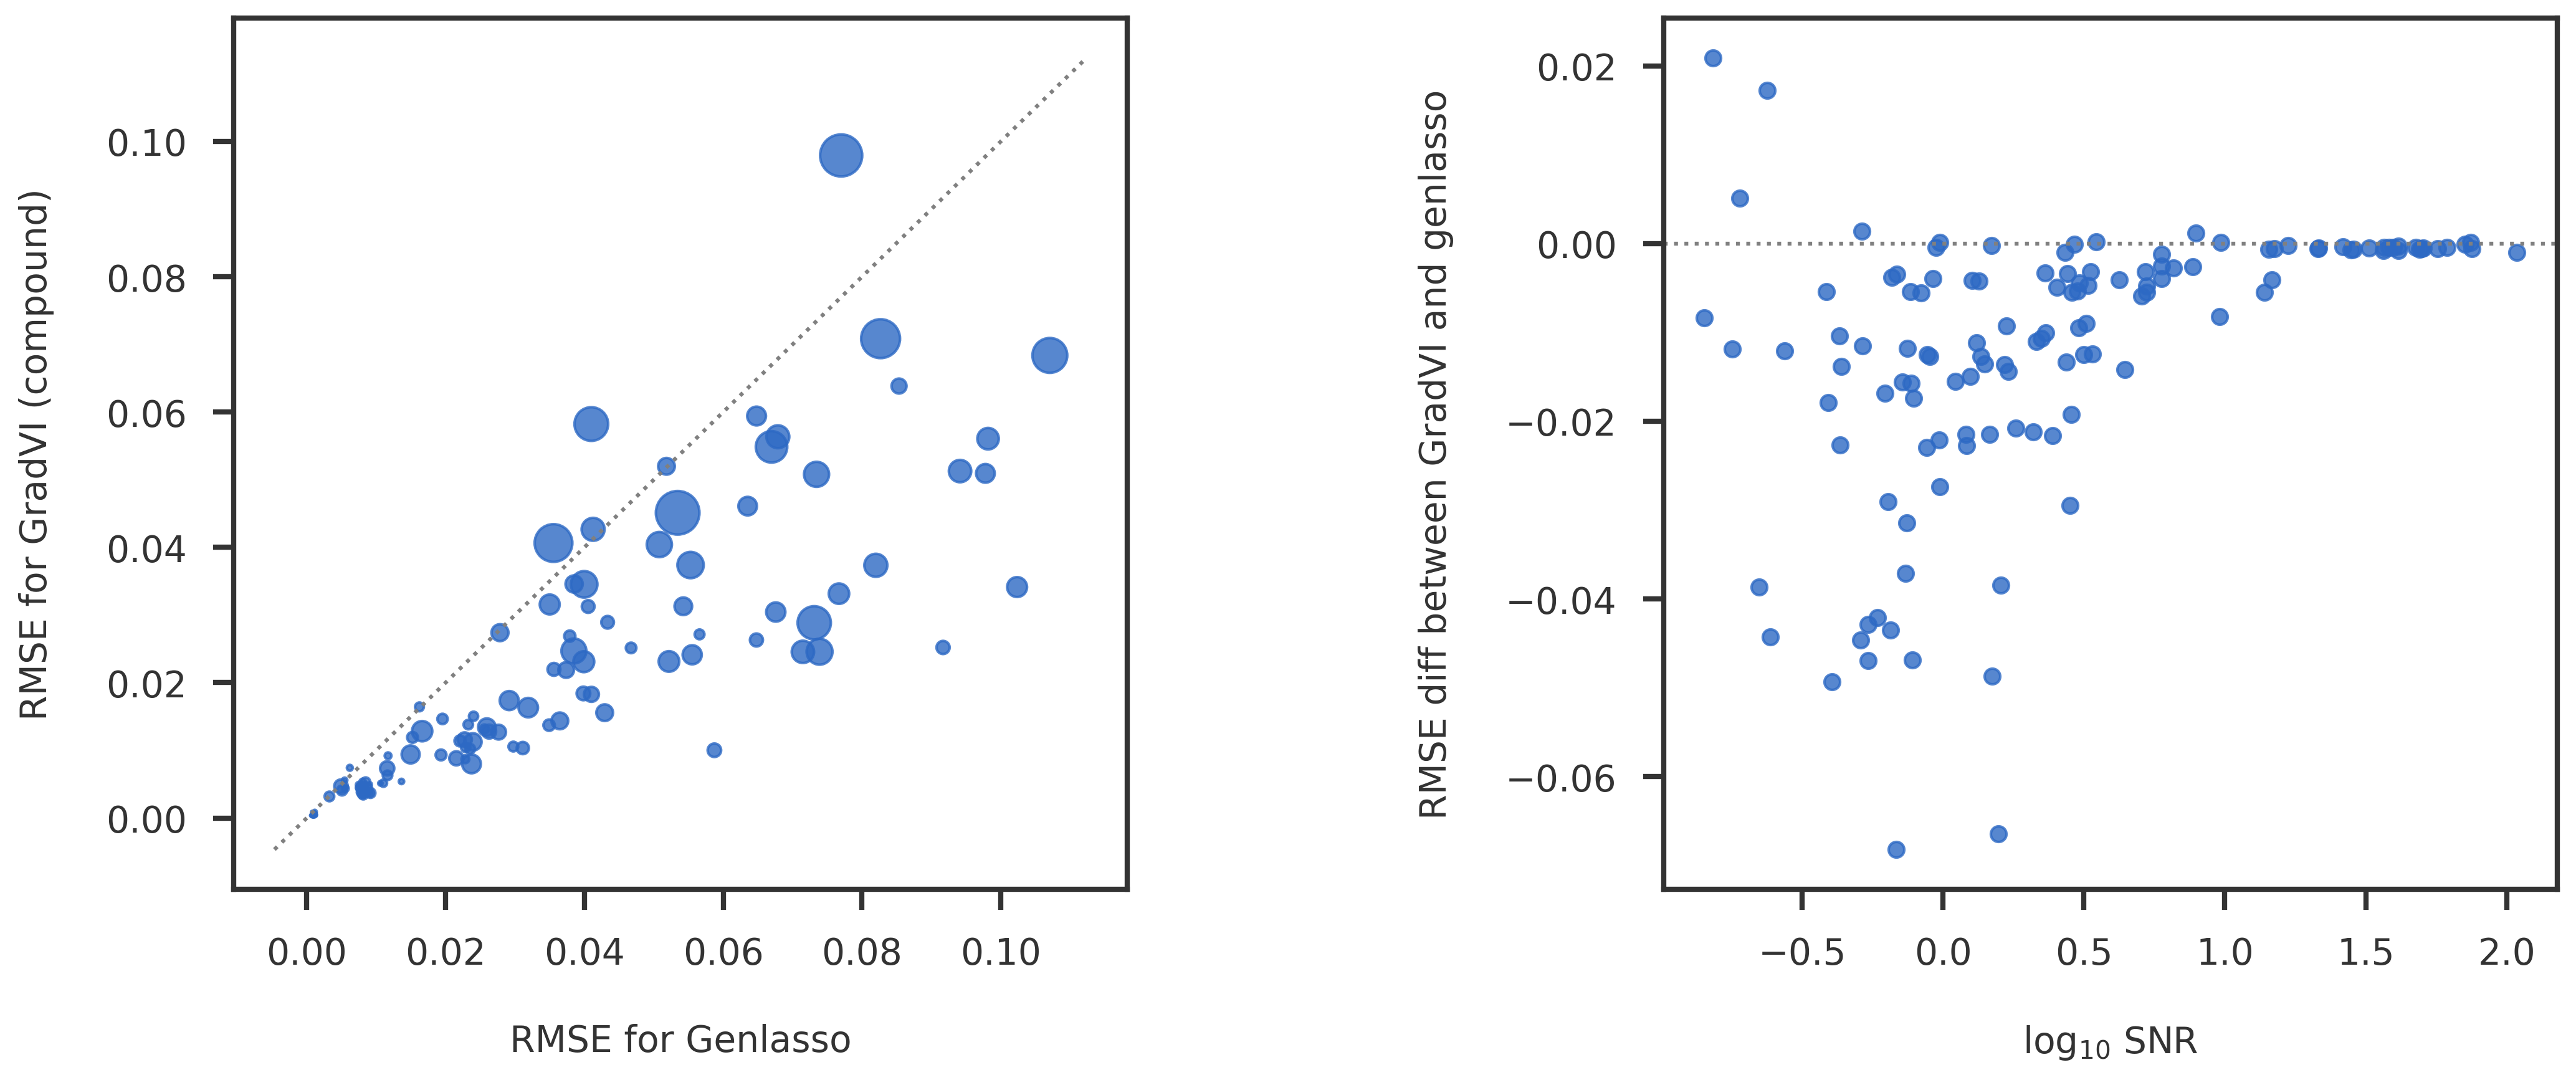

In [14]:
mse = dict()
mae = dict()

mpl_stylesheet.banskt_presentation(splinecolor = 'black', dpi = 300)

mse['genlasso'], mse['gradvi'], snr = get_xy_snr(dscout)
mae['genlasso'], mae['gradvi'], snr = get_xy_snr(dscout, errmode = 'mae')
snr_size = 40 / snr

fig = plt.figure(figsize = (14, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(mse['genlasso'], mse['gradvi'], s = snr_size, alpha = 0.8)
mpl_utils.plot_diag(ax1)

ax1.set_xlabel("RMSE for Genlasso")
ax1.set_ylabel("RMSE for GradVI (compound)")
# ax1.set_title("RMSE")

mse_diff = mse['gradvi'] - mse['genlasso']
isort = np.argsort(snr)
ax2.scatter(np.log10(snr[isort]), mse_diff[isort], alpha = 0.8)
ax2.axhline(y = 0, linestyle = 'dotted', color = 'gray')


# ax2.scatter(mae['genlasso'], mae['gradvi'], s = snr_size)
# mpl_utils.plot_diag(ax2)

ax2.set_xlabel(r"log$_{10}$ SNR")
ax2.set_ylabel(r"RMSE diff between GradVI and genlasso")
# ax2.set_title("MAE")

plt.tight_layout(w_pad = 8.)
plt.show()

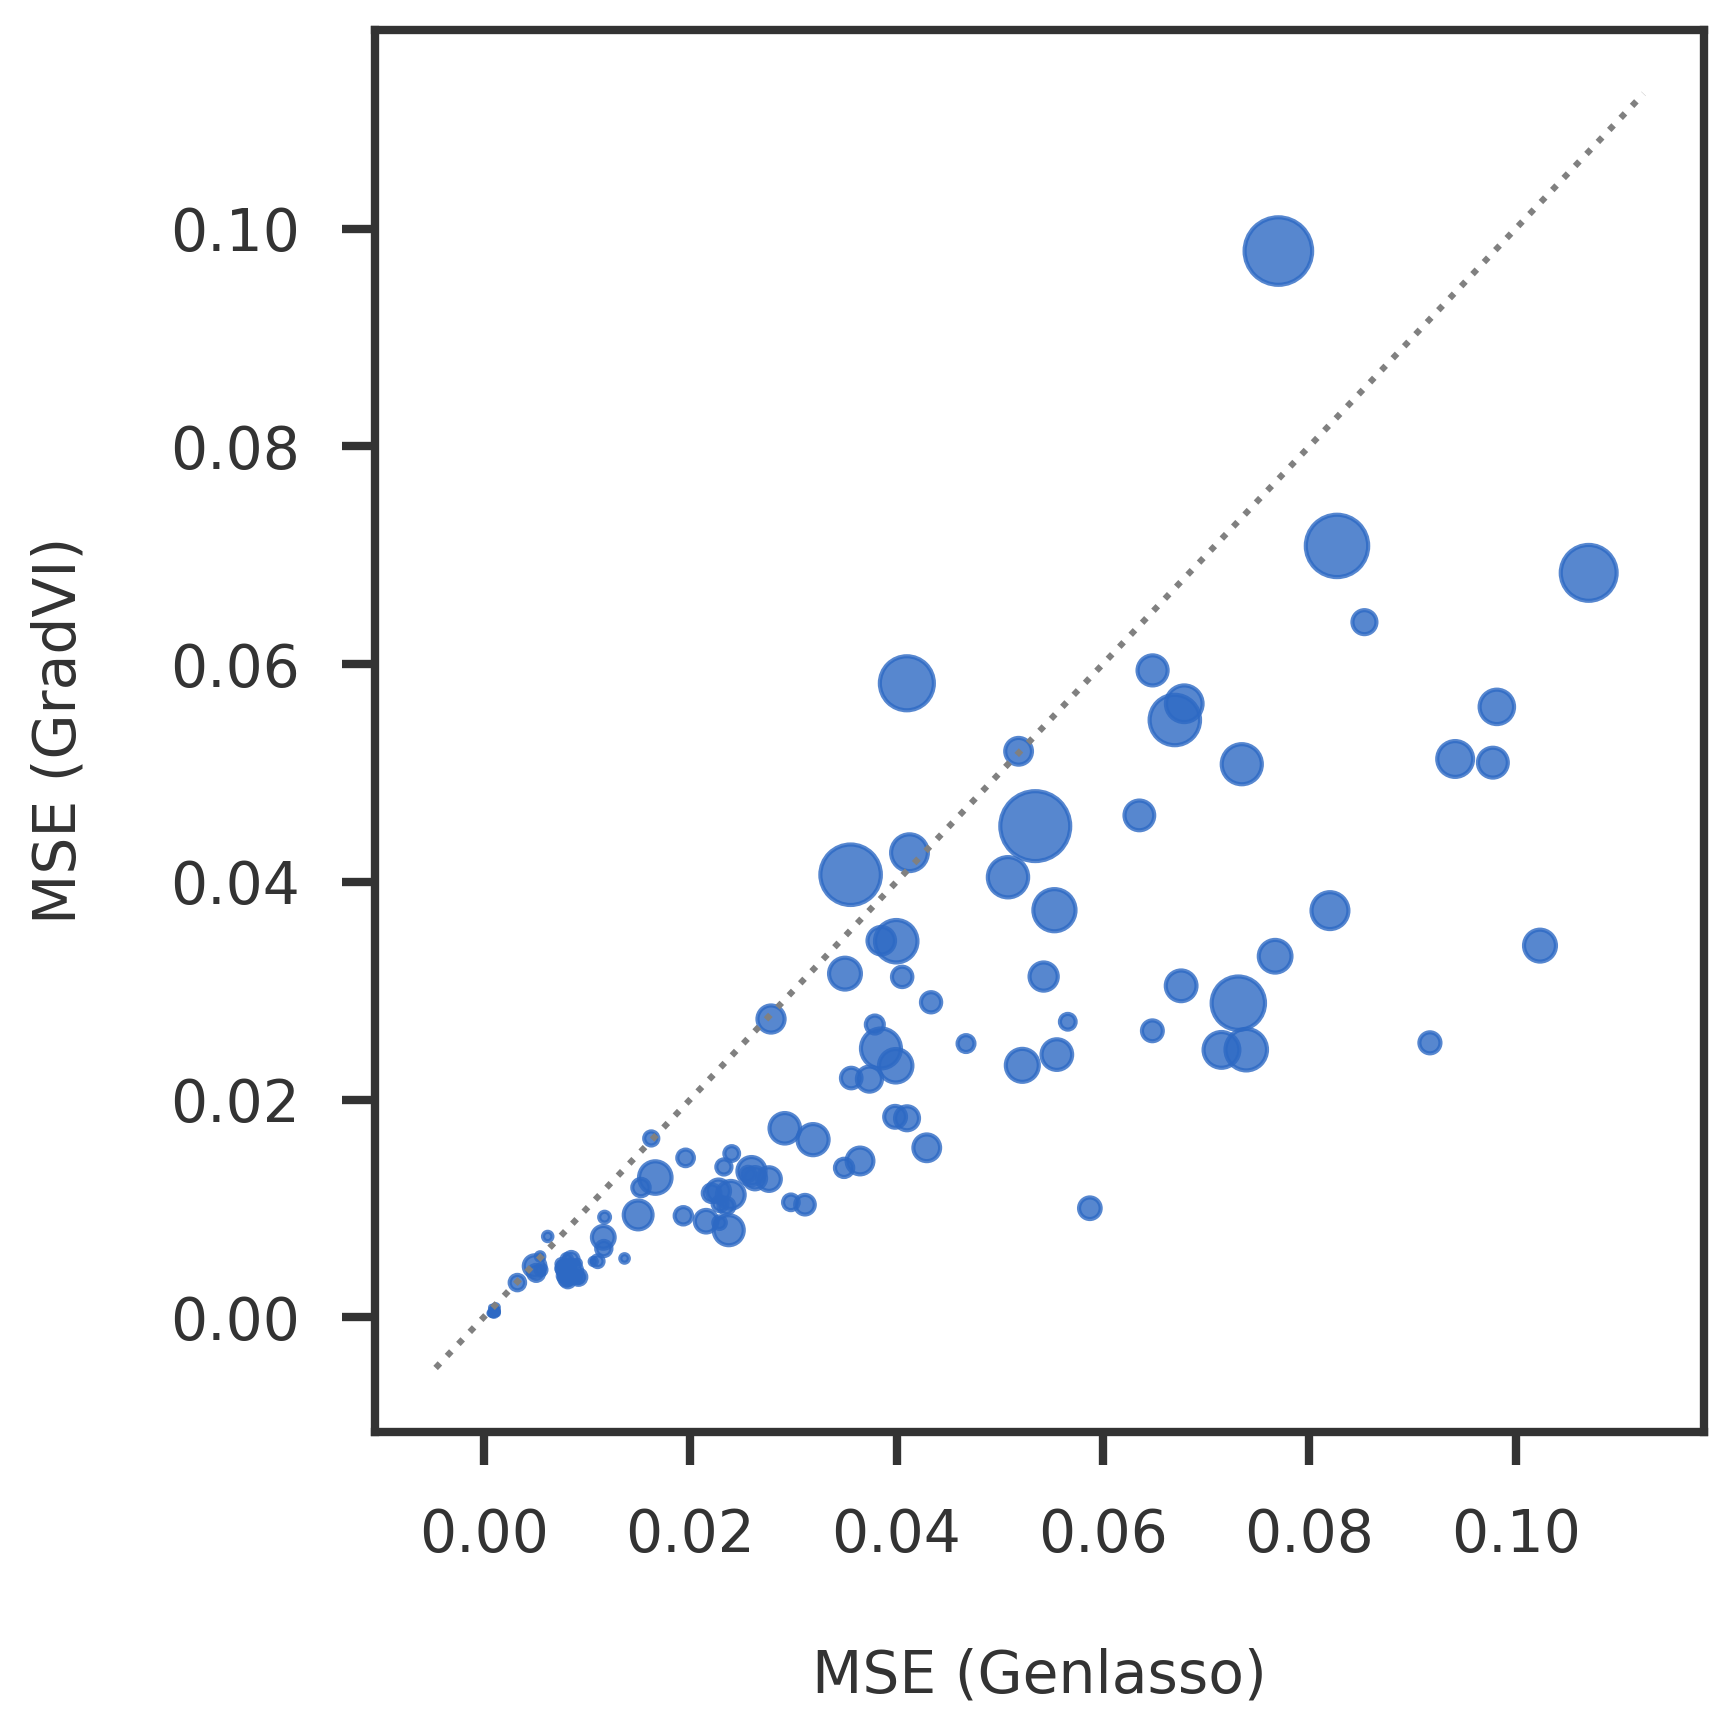

In [15]:
mpl_stylesheet.banskt_presentation(splinecolor = 'black', dpi = 300)

fig = plt.figure(figsize = (6, 6))
ax1 = fig.add_subplot(111)
ax1.scatter(mse['genlasso'], mse['gradvi'], s = snr_size, alpha = 0.8)
mpl_utils.plot_diag(ax1)
ax1.set_xlabel("MSE (Genlasso)")
ax1.set_ylabel("MSE (GradVI)")
plt.tight_layout()

utils.saveplot(fig, plotprefix)
plt.show()